### download the Credit Card DATASET

In [1]:
! pip install scikit-learn --upgrade --quiet

In [2]:
! pip install opendatasets --upgrade --quiet

In [3]:
import opendatasets as od
import numpy as np 
import pandas as pd 
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [4]:
od.version()

'0.1.22'

In [5]:
dataset_url = 'https://www.kaggle.com/datasets/arjunbhasin2013/ccdata?resource=download'

In [6]:
od.download(dataset_url)

Skipping, found downloaded files in "./ccdata" (use force=True to force download)


In [7]:
import os 

path = './ccdata'
os.listdir(path)

['CC GENERAL.csv', '.ipynb_checkpoints']

In [8]:
train_csv = path + '/CC GENERAL.csv'

In [9]:
ccd = pd.read_csv(train_csv)

### Preparing the data

In [10]:
ccd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [11]:
ccd

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [12]:
ccd.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [13]:
# remove the credit limit 1 null value
ccd[ccd['CREDIT_LIMIT'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [14]:
# removed the row which contains the Nan Value
ccd.drop([5203], axis=0,inplace=True)

In [15]:
ccd.reset_index(inplace=True)

In [16]:
ccd.drop('index', axis=1, inplace=True)

In [17]:
ccd[['PAYMENTS','MINIMUM_PAYMENTS']][(ccd['MINIMUM_PAYMENTS'].isnull())].shape[0]


313

In [18]:
# now there is another field that contains missing values which we shall input
# we can see we have 313 rows that are empty
# now we want to imput those rows
ccd[['PAYMENTS','MINIMUM_PAYMENTS']][(ccd['MINIMUM_PAYMENTS'].isnull()) & (ccd['PAYMENTS'] == 0)].shape[0]

240

In [19]:
# from the dataset we want to establish a connection between 2 variables
# the payments variable and the minimum payments
# the payments is basically the total amount paid by the user 
# the minimum payments is the minimum payments made by the user
# therefore if the PAYMENTS = 0 , then the MINIMUM_PAYMENTS = ? ... ofcourse it should be 0 as well
# we wrote a simple pandas Query that will take the payments == 0 and 
# that will return the null values as well, and then we will see how many rows is there
# where the MINIMUM_PAYMENTS == NaN AND PAYMENTS == 0
# THEN simply replace the MINIMUM_PAYMENTS With "0"
# the "returned result" from panads is the "NUM of ROWS" that statisfy the above condition
ccd[['PAYMENTS','MINIMUM_PAYMENTS']][(ccd['MINIMUM_PAYMENTS'].isnull()) & (ccd['PAYMENTS'] == 0)].shape[0]


240

In [20]:
payments_mean = np.mean(ccd['PAYMENTS'])
payments_mean

1733.3365108509329

In [21]:
# we have payments that are less than the mean, so it does make any sense to 
# impute the values of the empty columns[NaN columns] with the mean directly
# if the payments < payments_mean then use the values of the payments to impute -->
# --> the missing columns 

ccd[['PAYMENTS','MINIMUM_PAYMENTS']][(ccd['MINIMUM_PAYMENTS'].isnull()) & (ccd['PAYMENTS'] < payments_mean) &  (ccd['PAYMENTS'] > 0)].shape[0]


65

In [22]:
# is the payments > 0 and payments > mean
# then use the value of the mean to impute the missing value  
ccd[['PAYMENTS','MINIMUM_PAYMENTS']][(ccd['MINIMUM_PAYMENTS'].isnull()) & (ccd['PAYMENTS'] > payments_mean) & (ccd['PAYMENTS'] > 0)].shape[0]


8

In [23]:
# ccd.loc[(condition), 'column'] 
# 1st condition done
ccd.loc[(ccd['MINIMUM_PAYMENTS'].isnull()) & (ccd['PAYMENTS'] == 0), 'MINIMUM_PAYMENTS'] = 0

In [24]:
# 2nd condition done
ccd.loc[(ccd['MINIMUM_PAYMENTS'].isnull()) & (ccd['PAYMENTS'] < payments_mean) & (ccd['PAYMENTS'] > 0), 'MINIMUM_PAYMENTS'] = ccd['PAYMENTS']


In [25]:
# 3rd condition done
ccd.loc[(ccd['MINIMUM_PAYMENTS'].isnull()) & (ccd['PAYMENTS'] > payments_mean) & (ccd['PAYMENTS'] > 0), 'MINIMUM_PAYMENTS'] = payments_mean


In [26]:
ccd.info() # no null data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8949 entries, 0 to 8948
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8949 non-null   object 
 1   BALANCE                           8949 non-null   float64
 2   BALANCE_FREQUENCY                 8949 non-null   float64
 3   PURCHASES                         8949 non-null   float64
 4   ONEOFF_PURCHASES                  8949 non-null   float64
 5   INSTALLMENTS_PURCHASES            8949 non-null   float64
 6   CASH_ADVANCE                      8949 non-null   float64
 7   PURCHASES_FREQUENCY               8949 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 11  CASH_ADVANCE_TRX                  8949 non-null   int64  
 12  PURCHA

In [27]:
# we need to drop the ID's of the users
ccd = ccd.drop('CUST_ID',axis=1)


In [28]:
# Normalize the values
from sklearn.preprocessing import StandardScaler
ccd_df = ccd.copy()

In [29]:
scaler = StandardScaler()
ccd_standardize = pd.DataFrame(scaler.fit_transform(ccd_df), columns=ccd_df.columns)

### RANDOM COLUMNS FOR X

In [59]:

input_columns = list(ccd_standardize.columns[:-1])
y_column = list(ccd_standardize.columns[-1:])
selected_input_columns = random.sample(input_columns,k=int(len(input_columns)*0.80))

In [60]:
len(selected_input_columns), len(input_columns)

(12, 16)

In [61]:
y_column

['TENURE']

In [62]:
ccd_standardize[selected_input_columns]

,CASH_ADVANCE,BALANCE_FREQUENCY,PRC_FULL_PAYMENT,CASH_ADVANCE_FREQUENCY,INSTALLMENTS_PURCHASES,PAYMENTS,ONEOFF_PURCHASES,MINIMUM_PAYMENTS,PURCHASES_FREQUENCY,PURCHASES_TRX,BALANCE,CREDIT_LIMIT
0,-0.466805,-0.249881,-0.525588,-0.675294,-0.349114,-0.529026,-0.356957,-0.299303,-0.806649,-0.511381,-0.732054,-0.960380
1,2.605438,0.134049,0.234159,0.573949,-0.454607,0.818546,-0.356957,0.100137,-1.221928,-0.591841,0.786858,0.688601
2,-0.466805,0.517980,-0.525588,-0.675294,-0.454607,-0.383857,0.108843,-0.090437,1.269742,-0.109082,0.447041,0.826016
3,-0.368678,-1.017743,-0.525588,-0.258882,-0.454607,-0.598733,0.546123,-0.359042,-1.014290,-0.551611,0.049015,0.826016
4,-0.466805,0.517980,-0.525588,-0.675294,-0.454607,-0.364421,-0.347317,-0.254222,-1.014290,-0.551611,-0.358849,-0.905414
...,...,...,...,...,...,...,...,...,...,...,...,...
8944,-0.466805,0.517980,1.183844,-0.675294,-0.132688,-0.486266,-0.356957,-0.338109,1.269742,-0.350461,-0.738015,-0.960380
8945,-0.466805,0.517980,-0.525588,-0.675294,-0.122869,-0.503445,-0.356957,-0.240917,1.269742,-0.350461,-0.742488,-0.960380
8946,-0.466805,-0.185895,0.329128,-0.675294,-0.294930,-0.570660,-0.356957,-0.323750,0.854463,-0.390691,-0.740463,-0.960380
8947,-0.449373,-0.185895,0.329128,0.157536,-0.454607,-0.580581,-0.356957,-0.335167,-1.221928,-0.591841,-0.745239,-1.097795


In [63]:
X = ccd_df[selected_input_columns]
Y = ccd_df[y_column]

In [76]:
selected_input_columns

['CASH_ADVANCE',
 'BALANCE_FREQUENCY',
 'PRC_FULL_PAYMENT',
 'CASH_ADVANCE_FREQUENCY',
 'INSTALLMENTS_PURCHASES',
 'PAYMENTS',
 'ONEOFF_PURCHASES',
 'MINIMUM_PAYMENTS',
 'PURCHASES_FREQUENCY',
 'PURCHASES_TRX',
 'BALANCE',
 'CREDIT_LIMIT']

In [65]:
Y

,TENURE
0,12
1,12
2,12
3,12
4,12
...,...
8944,6
8945,6
8946,6
8947,6


In [ ]:
from sklearn.cluster import KMeans
# automatically uses the euclidean algorithm
model = KMeans(n_clusters=3, random_state=42)

In [67]:
X = ccd_df[selected_input_columns]

In [68]:
model.fit(X)

KMeans(n_clusters=3, random_state=42)

In [69]:
preds = model.predict(X)
preds

array([1, 2, 2, ..., 1, 1, 1], dtype=int32)

In [ ]:
np.unique(model.labels_) # 3 clusters 

array([0, 1, 2], dtype=int32)

In [ ]:
wcss = model.inertia_
wcss # within-cluster Sum of squares

203684900943.99127

In [70]:
# chose to random x and y for the plot
x = selected_input_columns[0]
y = selected_input_columns[3]

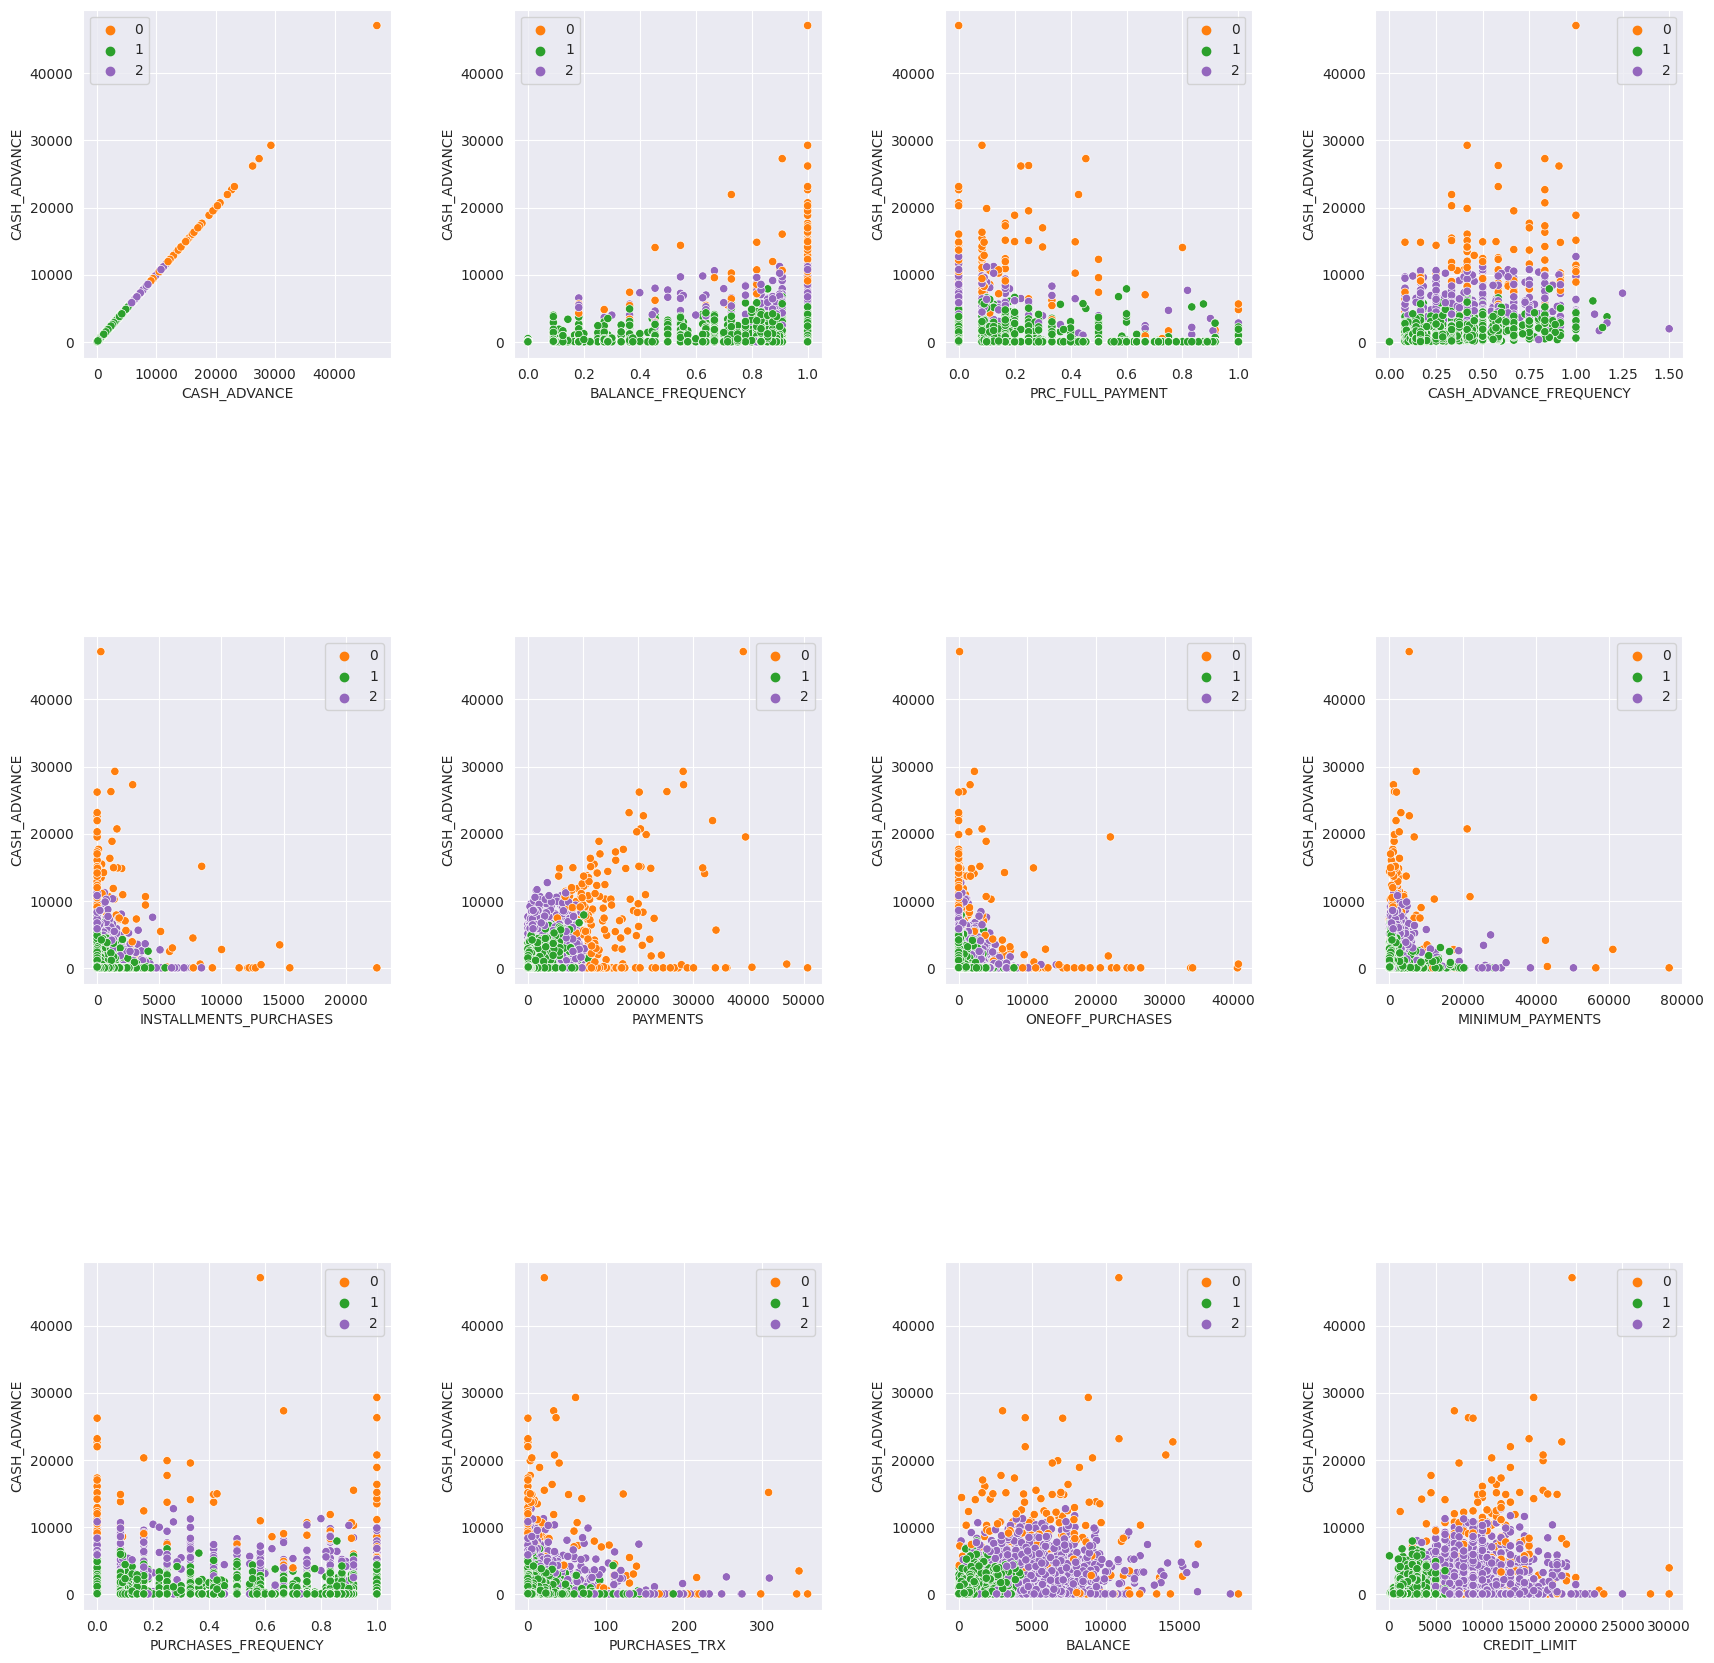

In [71]:
plt.subplots(nrows=3 , ncols=4 , figsize=(20,20))

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.8)

palette1=["#ff7f0e","#2ca02c","#9467bd"]

j=0 
for i in selected_input_columns:   
      
    plt.subplot(3,4,j+1)
    ax = sns.scatterplot(x=i , y=selected_input_columns[0], hue=preds, data=X, palette=palette1)
    j=j+1

In [43]:
import matplotlib
print(matplotlib.colors.TABLEAU_COLORS)  # Tableau colors
print(matplotlib.colors.CSS4_COLORS)     # Extended list of named colors

{'tab:blue': '#1f77b4', 'tab:orange': '#ff7f0e', 'tab:green': '#2ca02c', 'tab:red': '#d62728', 'tab:purple': '#9467bd', 'tab:brown': '#8c564b', 'tab:pink': '#e377c2', 'tab:gray': '#7f7f7f', 'tab:olive': '#bcbd22', 'tab:cyan': '#17becf'}
{'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred':

colors length:  8949


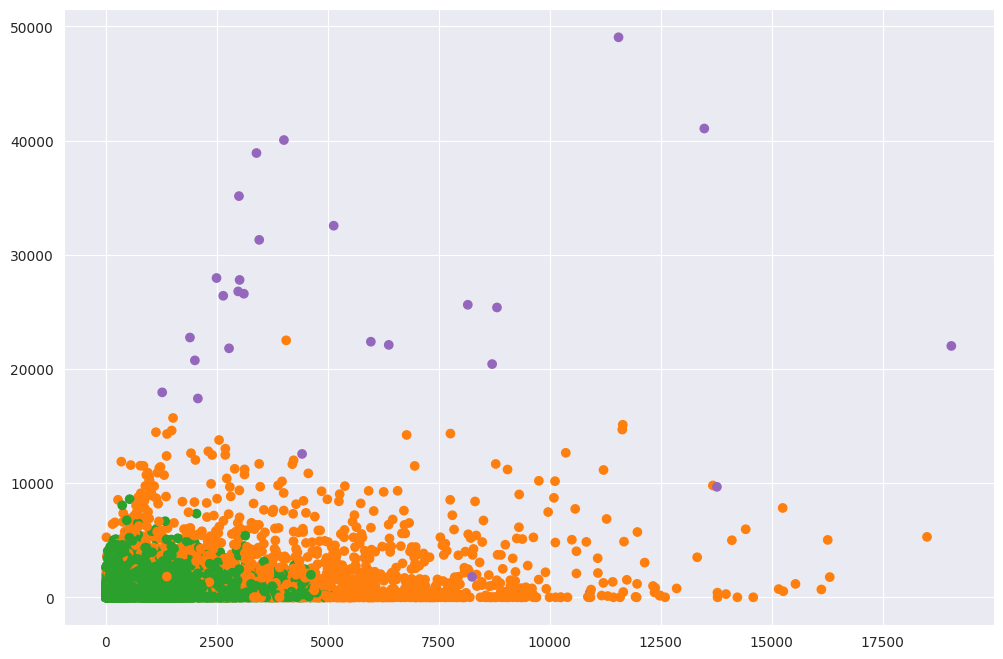

In [44]:
plt.figure(figsize=(12,8))
category_colors = ["#ff7f0e","#2ca02c","#9467bd"]

colors = [category_colors[p] for p in preds]
print('colors length: ', len(colors))

plt.scatter(data=X,x=input_columns[0], y=input_columns[2], c=colors)

plt.show()

In [45]:
np.unique(preds)

array([0, 1, 2], dtype=int32)